In [1]:
import json
import numpy as np
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as plt

from csc.mmp import *
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *

# Atom parameters
bmin = 0.005
bmax = 0.60
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.01
ymax = 0.034
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 1428 different atoms


In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_signals_{batchSize}.json'
path_to_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_omp_{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

# Create a ``MMPTree`` for a given signal

In [3]:
signal_dict = workbench.signalDictFromId(id=2133)
signal = signal_dict['signal']
mmp_tree = MMPTree(dictionary, signal, sparsity=4, connections=3)

In [4]:
mmp_tree.runMMPDF(branches_number=64, verbose=True)


BRANCH n°1 exploring path : (1, 1, 1, 1) | computed nodes = 4
    NEW MMPNode : ROOT  +  Node(1)
    NEW MMPNode : ROOT -> 1  +  Node(1)
    NEW MMPNode : ROOT -> 1 -> 1  +  Node(1)
    NEW MMPNode : ROOT -> 1 -> 1 -> 1  +  Node(1)

BRANCH n°2 exploring path : (2, 1, 1, 1) | computed nodes = 4
    NEW MMPNode : ROOT  +  Node(2)
    NEW MMPNode : ROOT -> 2  +  Node(1)
    NEW MMPNode : ROOT -> 2 -> 1  +  Node(1)
    NEW MMPNode : ROOT -> 2 -> 1 -> 1  +  Node(1)

BRANCH n°3 exploring path : (3, 1, 1, 1) | computed nodes = 4
    NEW MMPNode : ROOT  +  Node(3)
    NEW MMPNode : ROOT -> 3  +  Node(1)
    NEW MMPNode : ROOT -> 3 -> 1  +  Node(1)
    NEW MMPNode : ROOT -> 3 -> 1 -> 1  +  Node(1)

BRANCH n°4 exploring path : (1, 2, 1, 1) | computed nodes = 3
   ~~ Using MMPNode (ROOT -> 1) ~~
    NEW MMPNode : ROOT -> 1  +  Node(2)
    NEW MMPNode : ROOT -> 1 -> 2  +  Node(1)
    NEW MMPNode : ROOT -> 1 -> 2 -> 1  +  Node(1)

BRANCH n°5 exploring path : (2, 2, 1, 1) | computed nodes = 3
   ~~

In [5]:
mmp_tree.buildMMPTreeDict()

{'1-1-1-1': {'mse': 0.00039995690300025327,
  'atoms': [{'x': 90, 'b': 0.5, 'y': 0.024, 's': 4.691329017257407e-05},
   {'x': 320,
    'b': 0.025,
    'y': 0.018000000000000002,
    's': 2.7929259343351952e-05},
   {'x': 299,
    'b': 0.18000000000000002,
    'y': 0.01,
    's': 1.2618157813513104e-05},
   {'x': 653, 'b': 0.07, 'y': 0.022, 's': 4.0743735498882426e-05}]},
 '2-1-1-1': {'mse': 0.0005893349773967863,
  'atoms': [{'x': 155,
    'b': 0.5650000000000001,
    'y': 0.024,
    's': 4.691310829099851e-05},
   {'x': 444, 'b': 0.15, 'y': 0.022, 's': 4.1148871914324174e-05},
   {'x': 299,
    'b': 0.18000000000000002,
    'y': 0.01,
    's': 1.2618157813513104e-05},
   {'x': 285,
    'b': 0.06,
    'y': 0.018000000000000002,
    's': 3.019982920527559e-05}]},
 '3-1-1-1': {'mse': 0.0005163675838060643,
  'atoms': [{'x': 34,
    'b': 0.445,
    'y': 0.018000000000000002,
    's': 3.0471388181136083e-05},
   {'x': 444, 'b': 0.15, 'y': 0.022, 's': 4.1148871914324174e-05},
   {'x': 233, 

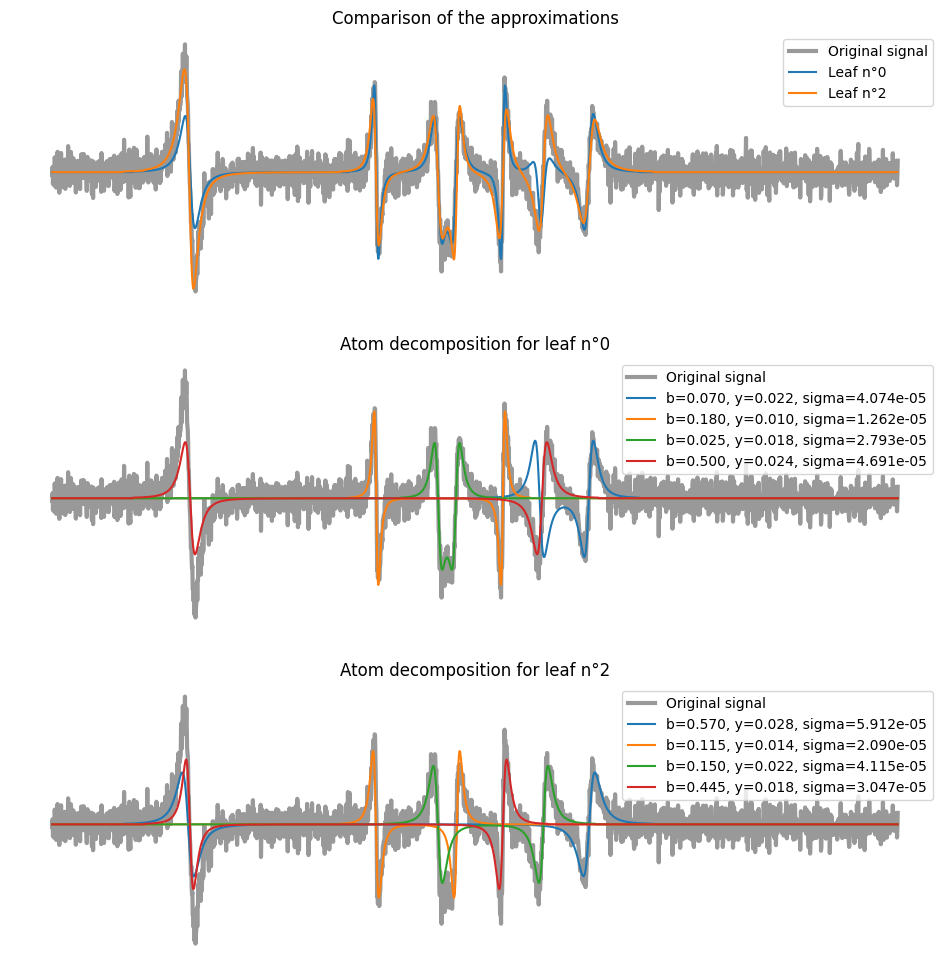

In [6]:
mmp_tree.plotLeavesComparisonFromIdx(0, 2)

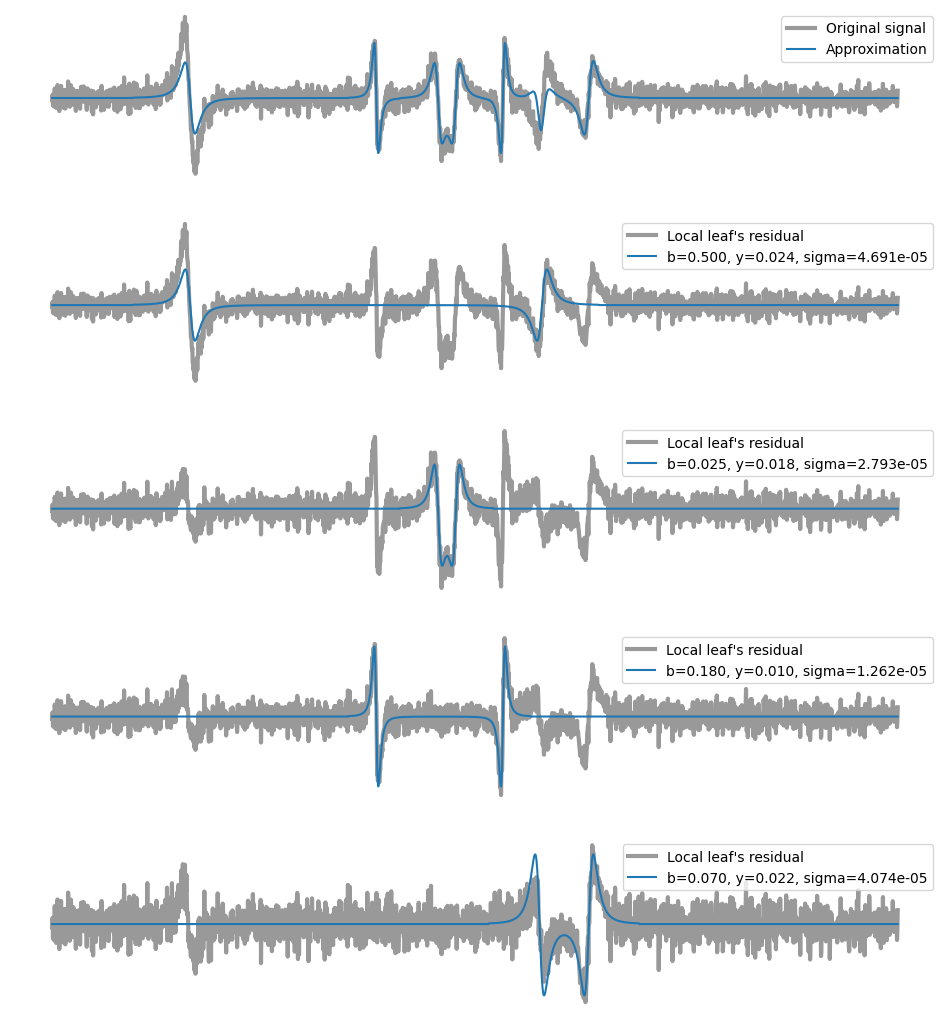

In [7]:
mmp_tree.plotLeafDecomposition(0)

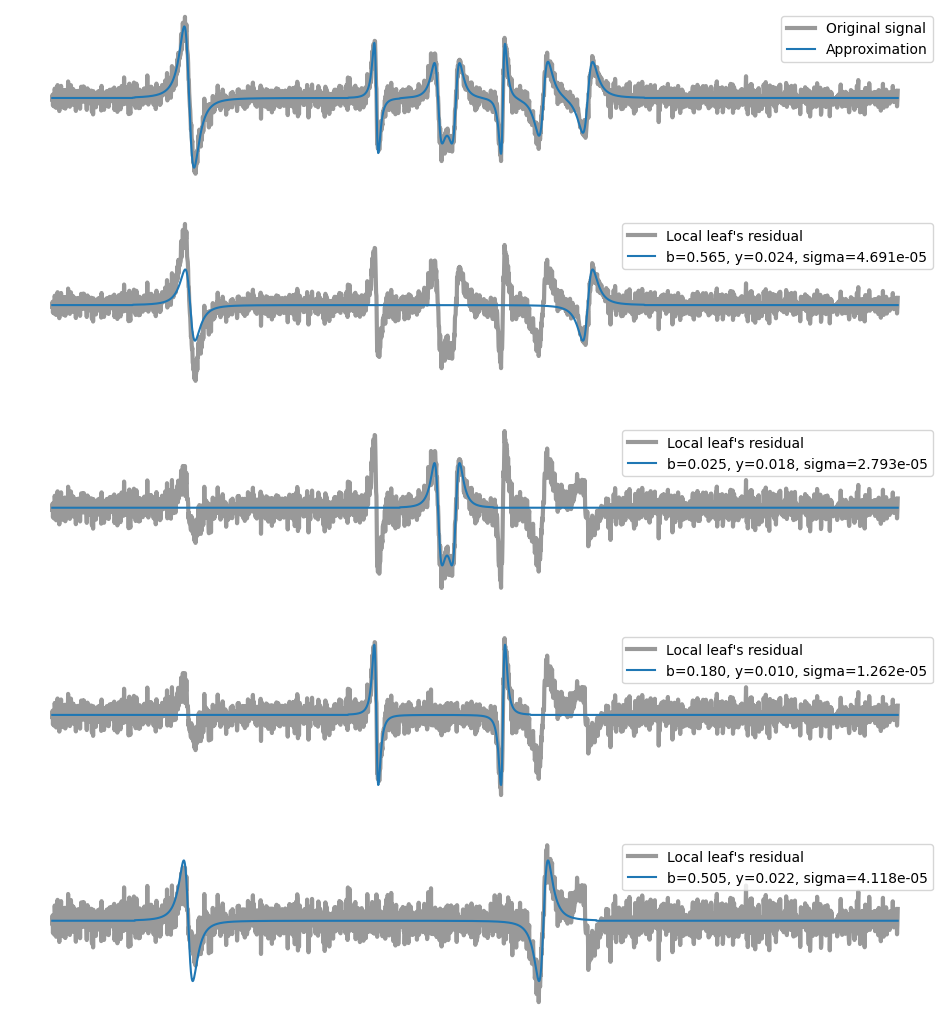

In [8]:
mmp_tree.plotLeafDecomposition(4)

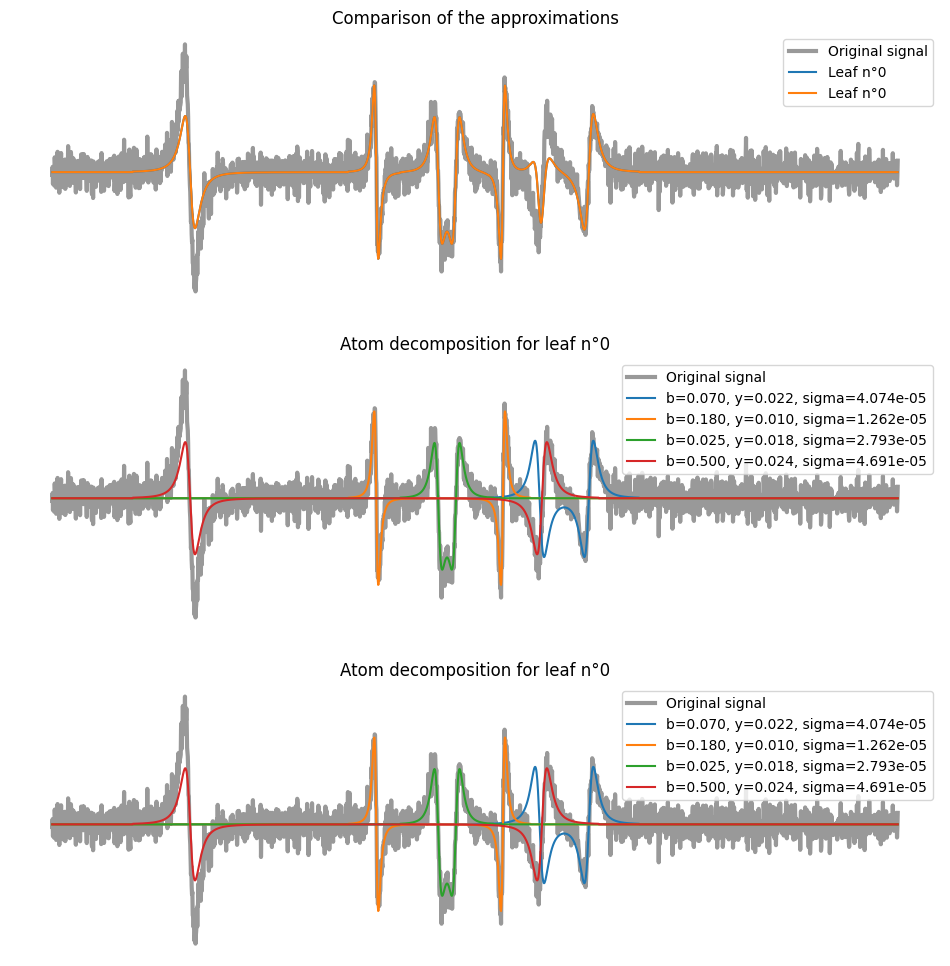

In [9]:
mmp_tree.plotOMPComparison()